<a href="https://colab.research.google.com/github/Sujay2810/Projects/blob/main/Protein_Helix_Native.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analyzing the Helical Structure Variations Using Deep Learning Approach**

**Problem Statement:**
Glycation disrupts protein structure, potentially leading to pathophysiological conditions.
Helices are the primary stable folds in proteins, essential for tertiary and quaternary structure formation.
Upon glycation, the helical architecture becomes prone to structural changes.
These variations can be analyzed using key helical parameters:

*   Residue per turn
*   Radius
*   Rise
*   Phi (ϕ) angle
*   Psi (ψ) angle
*   Twist


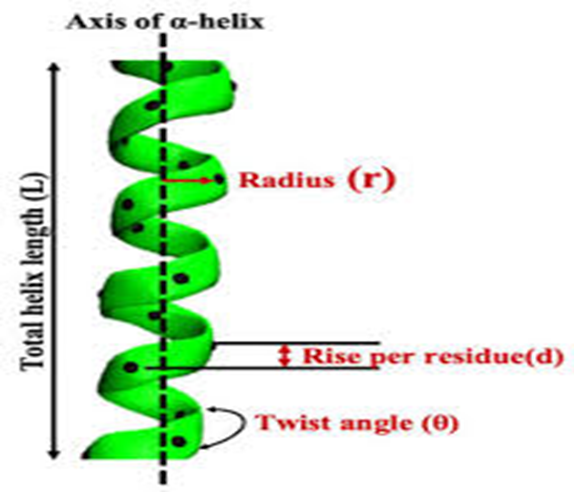











Objectives:

To Analyze Helical Structural Properties Using Key Attributes.

To Classify Helical Variations Using Clustering Techniques.

To Identify transition states of Helical structure among α, 310 & Pi.


First 5 rows of the dataset:
   Time      Phi      Psi  Residue per turn  Carbonyl angle   Radius     Rise  \
0  0.00 -62.7201 -42.9650          3.582546       11.288080  2.47653  1.55092   
1  0.01 -72.0607 -35.9527          3.661471       17.213043  2.49125  1.51009   
2  0.02 -64.6320 -41.7372          3.605736       12.425652  2.45237  1.50530   
3  0.03 -69.3657 -36.8099          3.599173       15.926014  2.51685  1.56630   
4  0.04 -70.4647 -34.8081          3.568569       17.049493  2.49313  1.54912   

       Hb3      Hb4      Hb5   Length    Twist  Hbond  MC-Hbond  SC-Hbond  
0  3.71049  3.67775  5.52757  18.7514  94.4022      9         9         0  
1  3.68178  3.50810  5.35840  18.2979  94.5705      9         9         0  
2  3.67617  3.58678  5.37375  18.1682  93.8113      7         7         0  
3  3.72147  3.83224  5.66050  18.9152  93.9531      8         8         0  
4  3.84583  3.93472  5.79585  18.7571  94.4136      6         6         0  
Dataset Info:
<class 'pandas

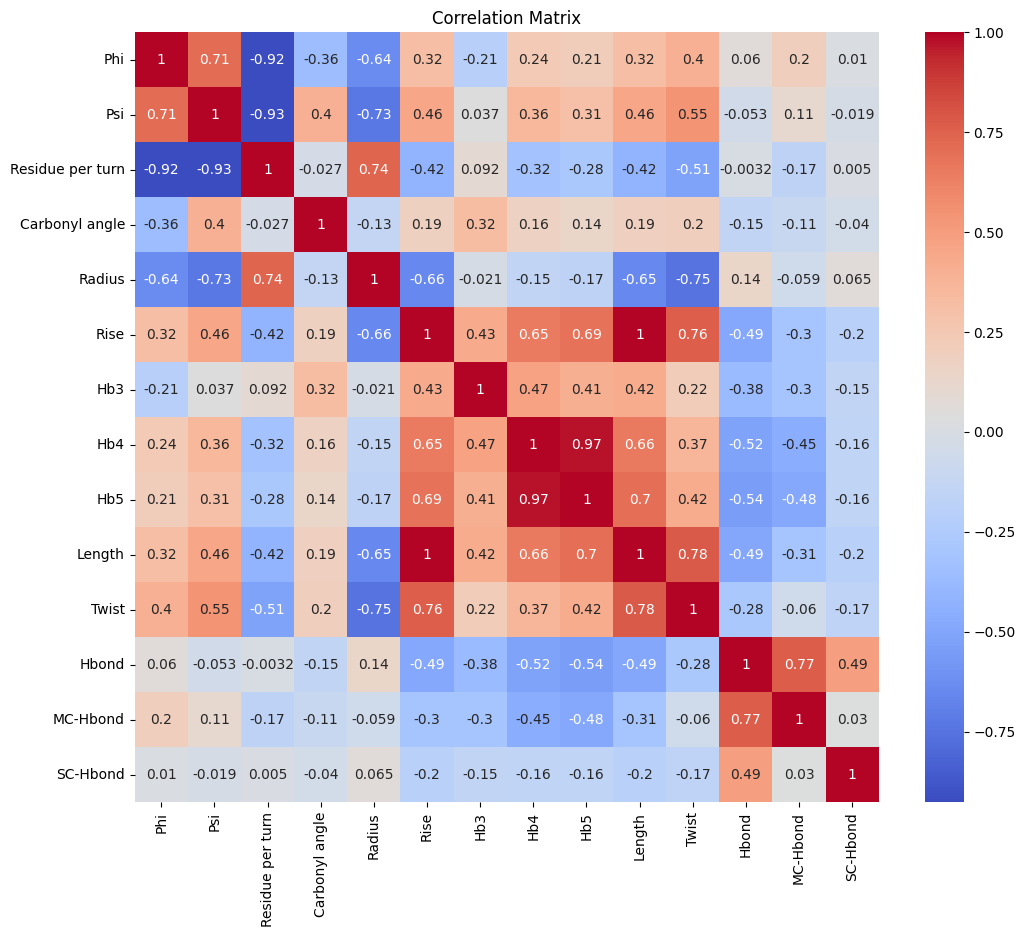

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
data = pd.read_csv('HelixnativeIAh2.csv')

# Display first few rows
print("First 5 rows of the dataset:")
print(data.head())

# Display basic info
print("Dataset Info:")
print(data.info())
print("\nShape of dataset:", data.shape)

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:", data.duplicated().sum())

# Summary statistics
print("\nStatistical Summary:")
print(data.describe())

# Outlier Detection using Z-score
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs((data[numeric_cols] - data[numeric_cols].mean()) / data[numeric_cols].std())
outliers = (z_scores > 3).sum()
print("\nOutlier Detection (Z-score > 3):")
print(outliers)

#Examine correlation between features and target
data_without_time = data.drop(columns=['Time'])
plt.figure(figsize=(12, 10))
correlation_matrix = data_without_time.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

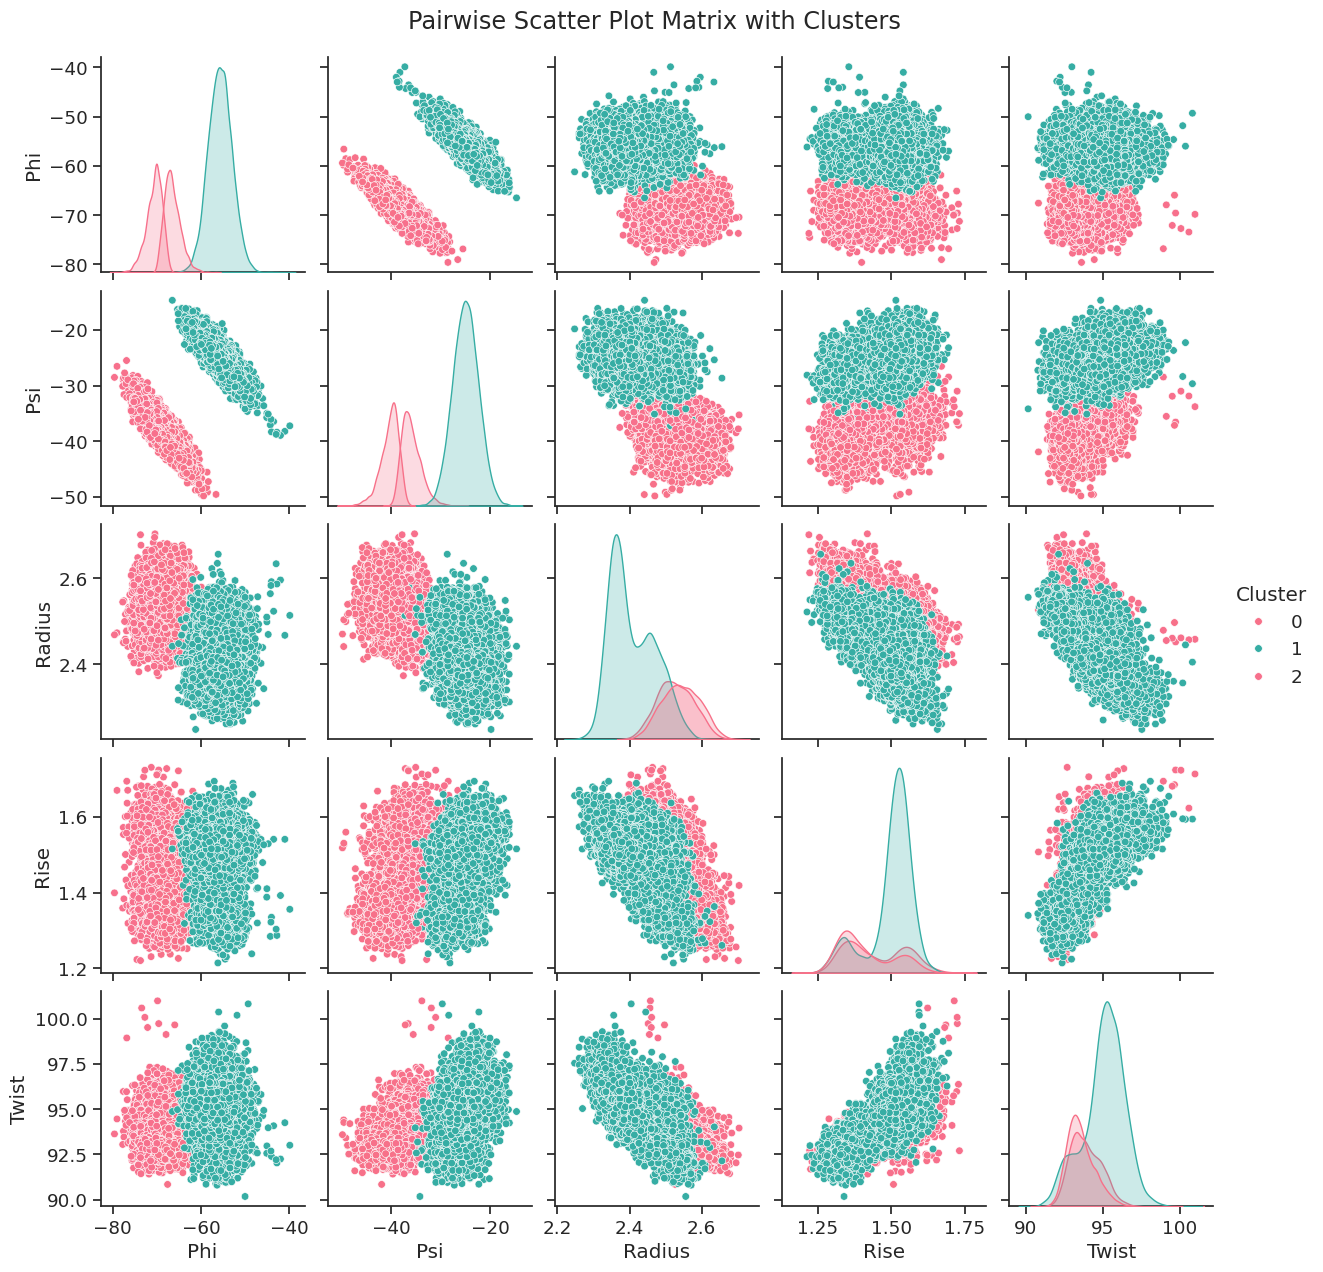

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  # Required for clustering

# Load your dataset
file_path = "HelixnativeIAh2.csv"
df = pd.read_csv(file_path)

# Step 1: Create cluster labels (adjust n_clusters for alpha/310/pi helices)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Phi', 'Psi', 'Residue per turn']])

# Step 2: Pair plot with cluster-based colors
selected_features = ['Phi', 'Psi', 'Radius', 'Rise','Twist','Cluster']
sns.set(style="ticks", font_scale=1.2)
pairplot = sns.pairplot(
    data=df[selected_features],
    hue='Cluster',          # Color by cluster labels
    palette='husl',         # Distinct color palette
    diag_kind='kde',        # Kernel density plots on diagonal
    plot_kws={'s': 30}      # Adjust marker size
)
plt.suptitle("Pairwise Scatter Plot Matrix with Clusters", y=1.02)
plt.show()


In [5]:
# Import necessary libraries
import pandas as pd

# Load the dataset
# Replace 'your_dataset.csv' with the path to your dataset file
df = pd.read_csv('HelixnativeIAh2.csv')

# Calculate the ratio of Rise to Residue per turn and create a new column
df['Rise_to_Residue_ratio'] = df['Rise'] / df['Residue per turn']

# Display the first few rows of the updated dataframe
print(df.head())

# Save the updated dataframe to a new CSV file (optional)
df.to_csv('updated_dataset_with_ratios.csv', index=False)


   Time      Phi      Psi  Residue per turn  Carbonyl angle   Radius     Rise  \
0  0.00 -62.7201 -42.9650          3.582546       11.288080  2.47653  1.55092   
1  0.01 -72.0607 -35.9527          3.661471       17.213043  2.49125  1.51009   
2  0.02 -64.6320 -41.7372          3.605736       12.425652  2.45237  1.50530   
3  0.03 -69.3657 -36.8099          3.599173       15.926014  2.51685  1.56630   
4  0.04 -70.4647 -34.8081          3.568569       17.049493  2.49313  1.54912   

       Hb3      Hb4      Hb5   Length    Twist  Hbond  MC-Hbond  SC-Hbond  \
0  3.71049  3.67775  5.52757  18.7514  94.4022      9         9         0   
1  3.68178  3.50810  5.35840  18.2979  94.5705      9         9         0   
2  3.67617  3.58678  5.37375  18.1682  93.8113      7         7         0   
3  3.72147  3.83224  5.66050  18.9152  93.9531      8         8         0   
4  3.84583  3.93472  5.79585  18.7571  94.4136      6         6         0   

   Rise_to_Residue_ratio  
0               0.43291

In [6]:
# Import necessary libraries
import pandas as pd
from scipy.stats import skew, kurtosis

# Load the dataset
# Replace 'HelixnativellIah1.csv' with the path to your dataset file
df = pd.read_csv('HelixnativeIAh2.csv')

# Calculate skewness and kurtosis for each numerical column
results = {}
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        results[column] = {
            'Skewness': skew(df[column]),
            'Kurtosis': kurtosis(df[column])
        }

# Convert results to a DataFrame for better visualization
eda_results = pd.DataFrame(results).T

# Display the skewness and kurtosis values
print(eda_results)

# Save the results to a CSV file (optional)
eda_results.to_csv('skewness_kurtosis_results.csv', index=True)


                  Skewness  Kurtosis
Time              0.000000 -1.200000
Phi              -0.373920 -1.228158
Psi              -0.420240 -1.221581
Residue per turn  0.472958 -1.707672
Carbonyl angle   -0.056872  0.375602
Radius            0.127695 -0.983860
Rise             -0.495001 -0.877761
Hb3               0.184734  0.126264
Hb4               0.468161 -0.729432
Hb5               0.390891 -0.860322
Length           -0.505677 -0.872493
Twist             0.121239 -0.473174
Hbond             0.106385 -0.116081
MC-Hbond         -0.386268 -0.058565
SC-Hbond          1.170595  0.786972


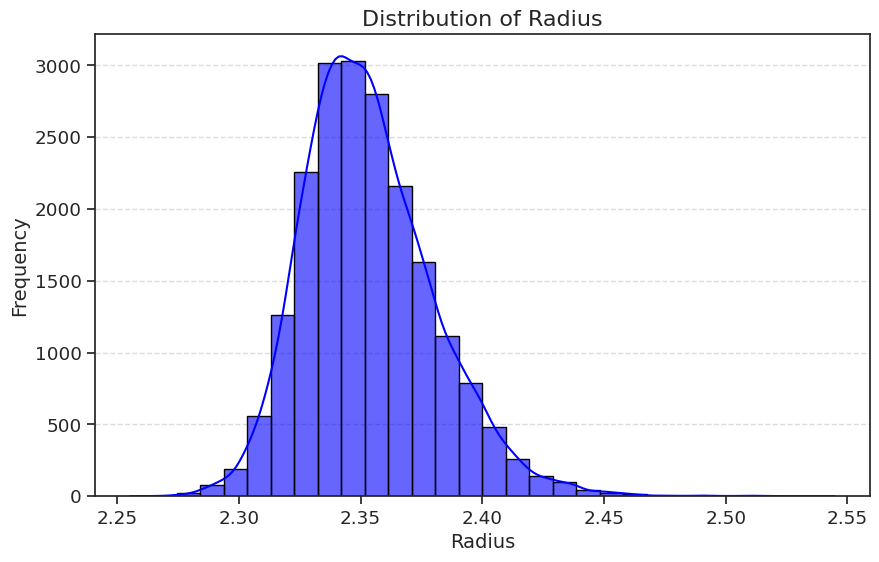

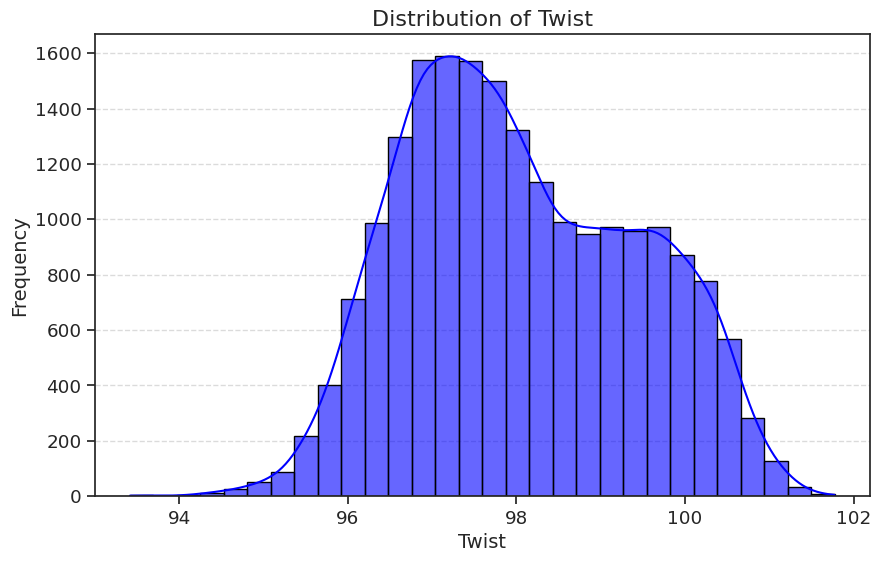

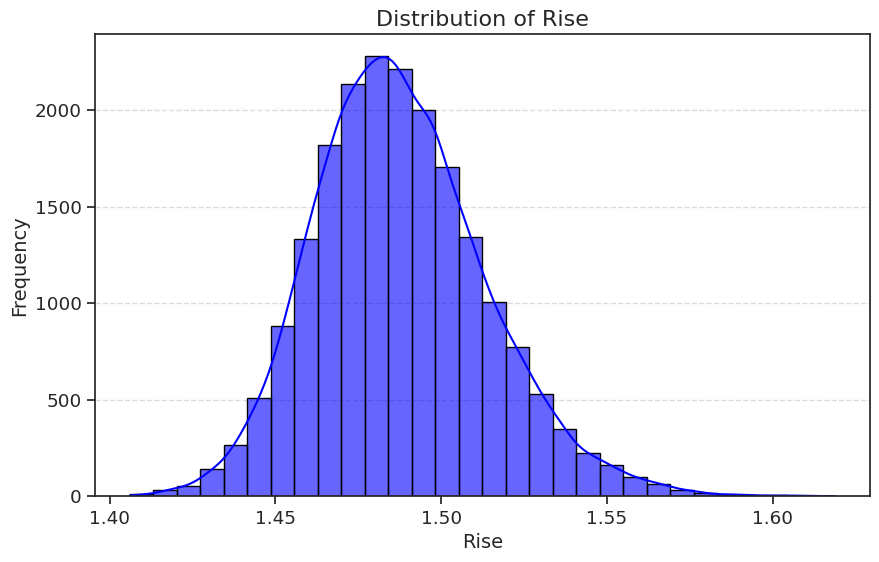

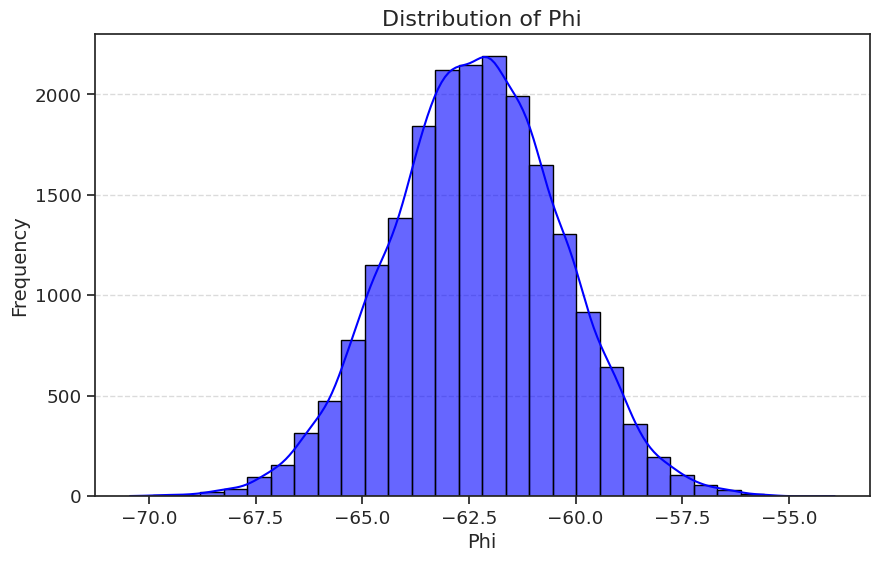

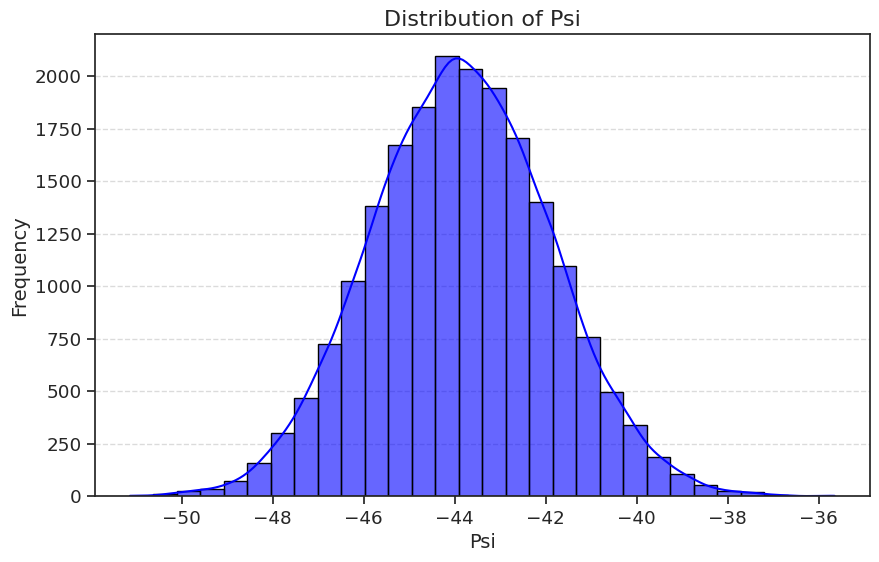

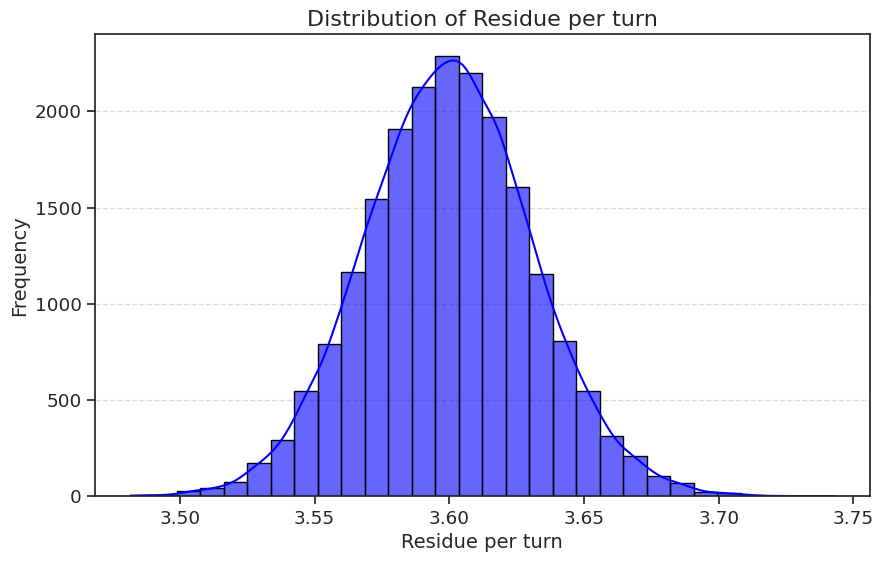

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace 'Helixnativellah1.csv' with the path to your dataset file
data = pd.read_csv('HelixnativeIAh2.csv')

# List of features to analyze
features = ['Radius', 'Twist', 'Rise','Phi','Psi','Residue per turn']

# Plot histograms and KDE plots for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True, bins=30, color='blue', alpha=0.6, edgecolor='black')
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


Backbone Conformation (Phi, Psi):
The Phi and Psi histograms show sharp, narrow peaks, indicating that most residues in the dataset adopt a very consistent set of backbone dihedral angles.

Helical Parameters (Residue per Turn, Rise, Radius):
Residue per turn is tightly clustered around 3.6, the canonical value for alpha-helices, confirming the presence of regular helical structures.

Rise per residue and Radius also show narrow, symmetric distributions, which further supports the idea that the protein structures are dominated by canonical alpha-helical geometry.

These consistent values indicate that the helices in the dataset are not only present but also geometrically regular, with little deviation from ideal parameters.

The Twist distribution, which is related to the angular rotation per residue, is also tightly clustered, suggesting that the helices maintain a consistent geometry throughout the dataset.


Explained Variance Ratio: [0.41590128 0.22338229 0.09524633]

Feature Contribution to Principal Components:
          Phi       Psi  Residue per turn  Carbonyl angle    Radius      Rise  \
PC1  0.219302  0.292004         -0.276652        0.102174 -0.299449  0.377156   
PC2  0.399358  0.303924         -0.379532       -0.117100 -0.285339 -0.073244   
PC3 -0.362704  0.202409          0.083746        0.742998 -0.128557  0.035979   

          Hb3       Hb4       Hb5    Length     Twist     Hbond  MC-Hbond  \
PC1  0.163243  0.309324  0.313221  0.379089  0.329227 -0.220055 -0.131763   
PC2 -0.305444 -0.217352 -0.229023 -0.074103  0.098219  0.354002  0.388180   
PC3  0.269602 -0.181266 -0.203264  0.033539  0.157304  0.175794  0.199877   

     SC-Hbond  
PC1 -0.097092  
PC2  0.139553  
PC3  0.083746  


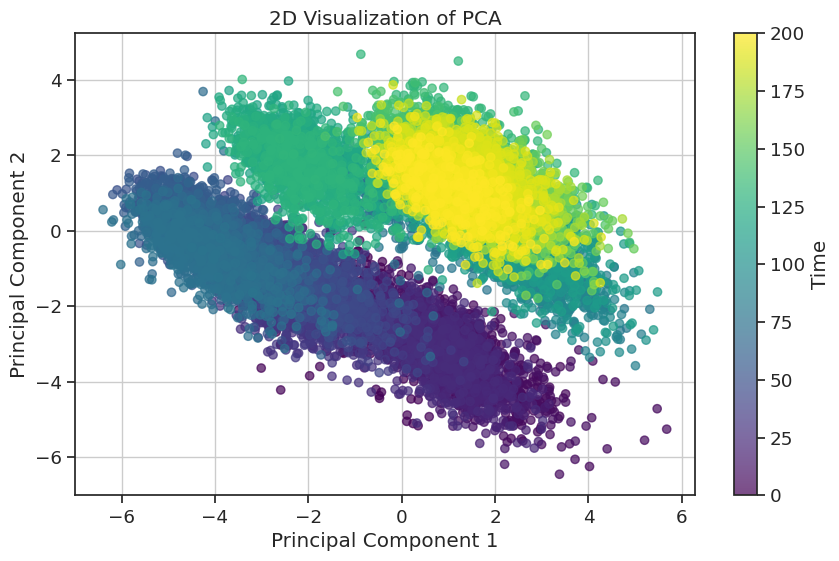

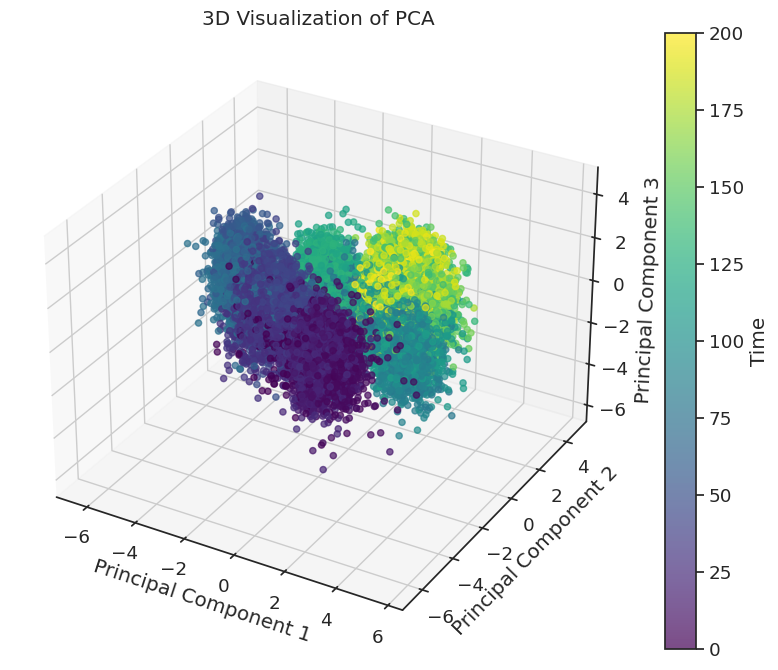

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
# Replace 'Helixnativellah1.csv' with your file path
data = pd.read_csv('HelixnativeIAh2.csv')

# Select numerical features for PCA (excluding 'Time' column)
features = ['Phi', 'Psi', 'Residue per turn', 'Carbonyl angle', 'Radius', 'Rise',
            'Hb3', 'Hb4', 'Hb5', 'Length', 'Twist', 'Hbond', 'MC-Hbond', 'SC-Hbond']
X = data[features]

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=3)  # Reduce to 3 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Contribution of each feature to the principal components
contribution = pd.DataFrame(pca.components_, columns=features, index=['PC1', 'PC2', 'PC3'])
print("\nFeature Contribution to Principal Components:")
print(contribution)

# Visualize the reduced data in 2D (using first two principal components)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, c=data['Time'], cmap='viridis')
plt.colorbar(label='Time')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of PCA')
plt.grid()
plt.show()

# Visualize the reduced data in 3D (using three principal components)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=data['Time'], cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Time')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Visualization of PCA')
plt.show()


Significance of Principal Component Analysis

Backbone dihedral angles (Phi, Psi) are the primary drivers of structural variation in the dataset.

Secondary structure parameters (Rise, Radius, RPT, Twist) also contribute significantly to the observed variance.

Protein undergoes a systematic conformational change over time rather than random fluctuations.



Training set size: (16000, 14)
Testing set size: (4001, 14)

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.0001
Mean Absolute Error (MAE): 0.0054
R² Score: 0.9997


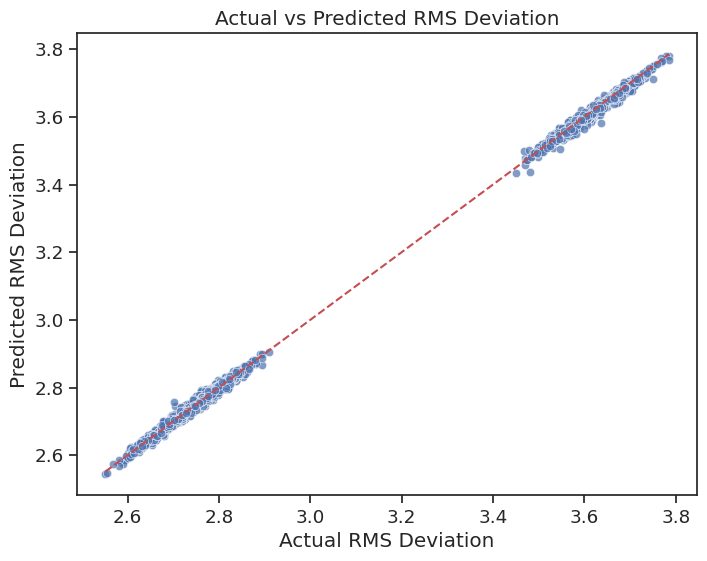

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer


# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Data Loading and Exploration
data = pd.read_csv('HelixnativeIAh2.csv')


# Define the target variable
target = 'Residue per turn'

# Ensure the target column exists
if target not in data.columns:
    raise ValueError(f"Target column '{target}' not found in the dataset.")

# Define feature variables (X) and target variable (y)
X = data.drop([target], axis=1)
y = data[target]


# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Data Scaling

# Scaling is crucial for neural networks


scaler = StandardScaler()

# Fit on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optionally, scale the target variable
# Depending on the distribution, scaling might help
# Here, we'll scale the target as well
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

# 6. Model Definition and Training

# Define the MLP Regressor


mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32, 16),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=100,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10
)

# Train the model
mlp.fit(X_train_scaled, y_train_scaled)

# Evaluation

# Make predictions on test set
y_pred_scaled = mlp.predict(X_test_scaled)

# Inverse transform to get original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_original = y_test.values

# Calculate evaluation metrics
mse = mean_squared_error(y_test_original, y_pred)
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_original, y=y_pred, alpha=0.7)
plt.xlabel('Actual RMS Deviation')
plt.ylabel('Predicted RMS Deviation')
plt.title('Actual vs Predicted RMS Deviation')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--')
plt.show()





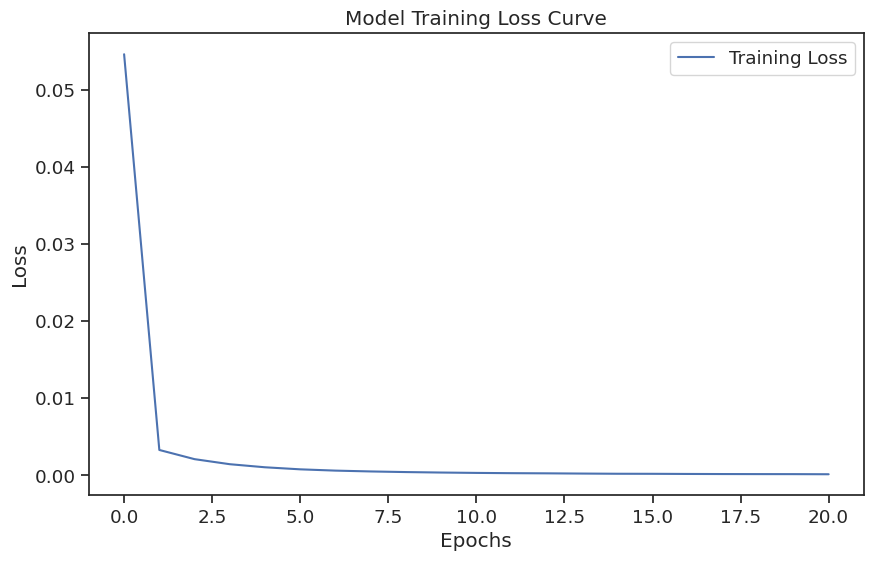

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Loss Curve')
plt.legend()
plt.show()


Processing dataset: HelixnativeIAh2.csv


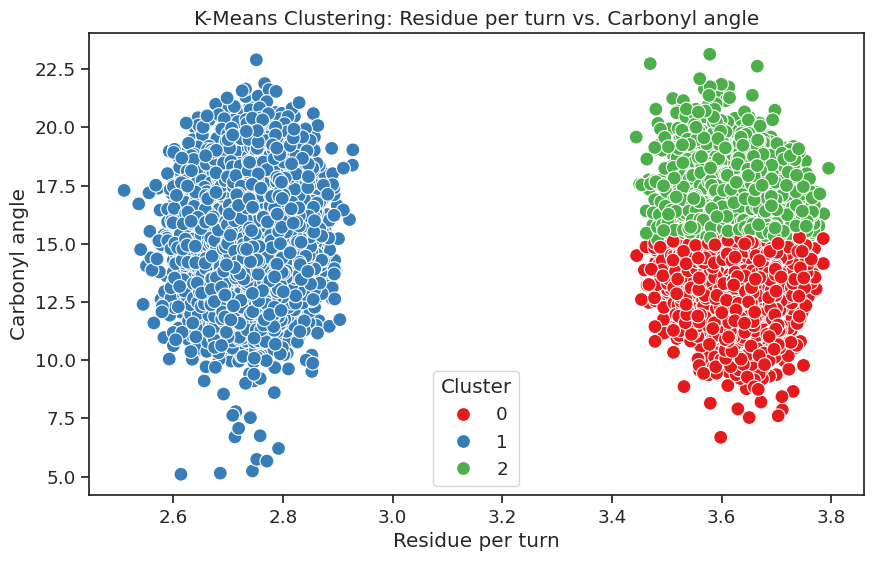

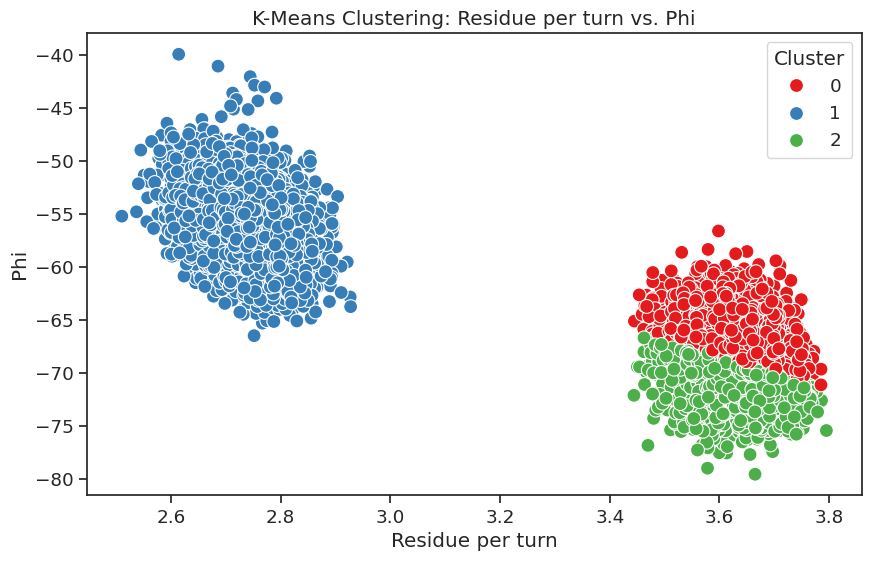

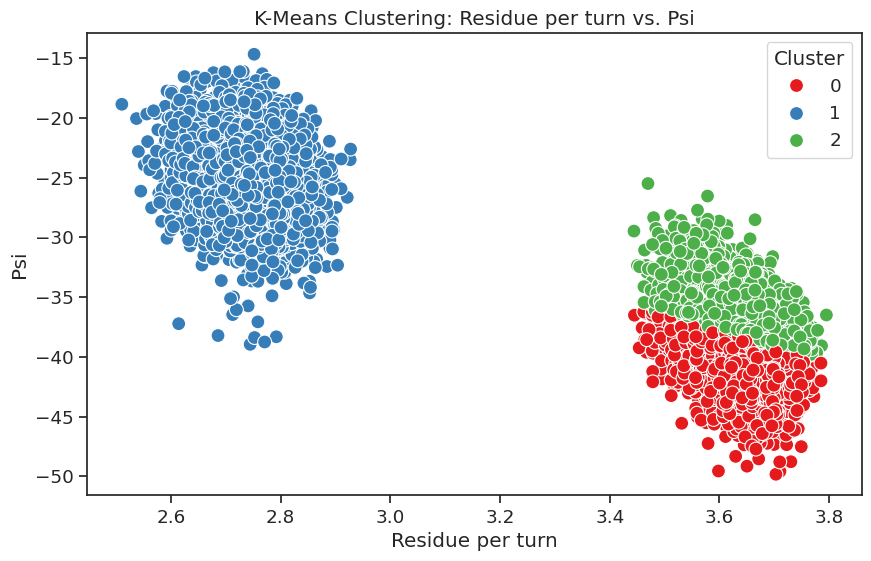

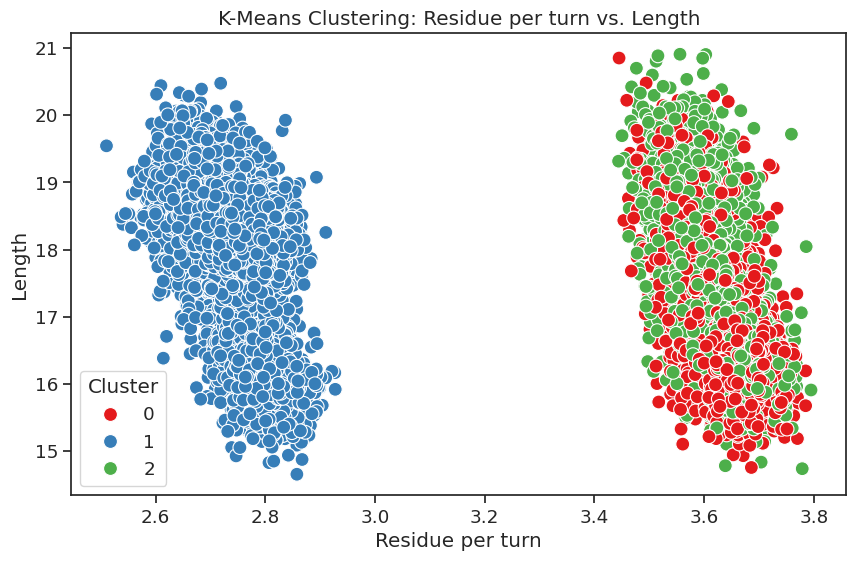

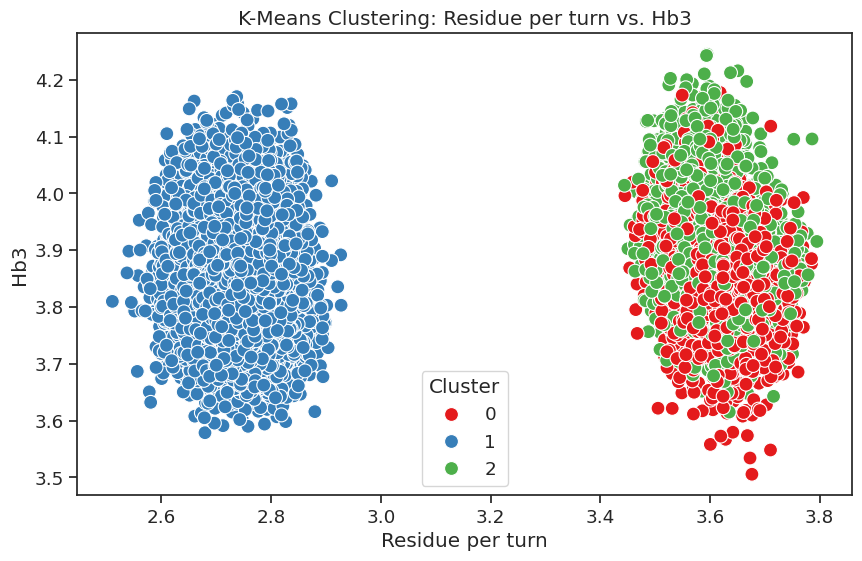

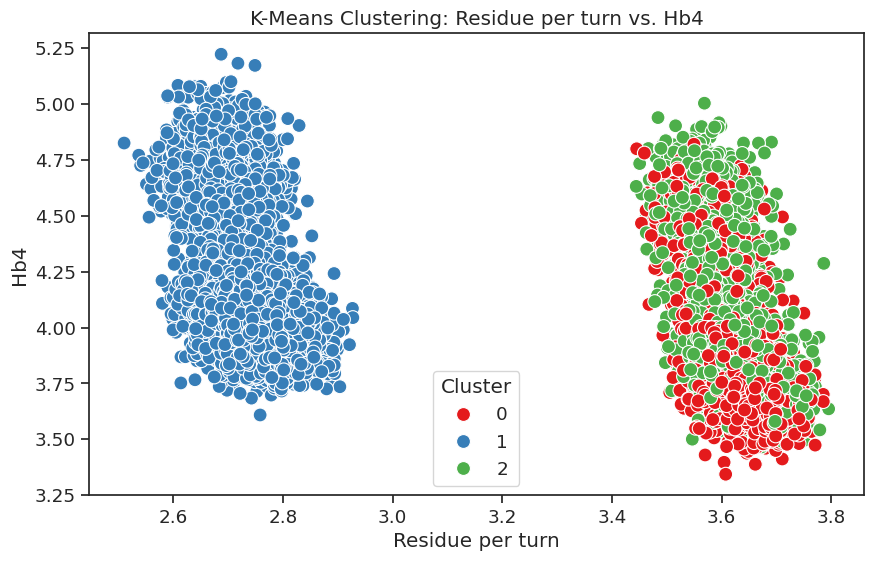

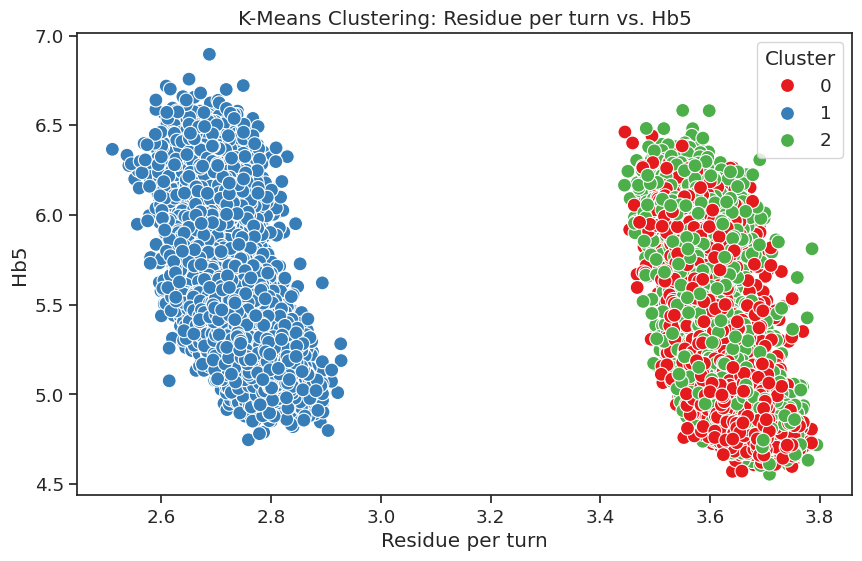

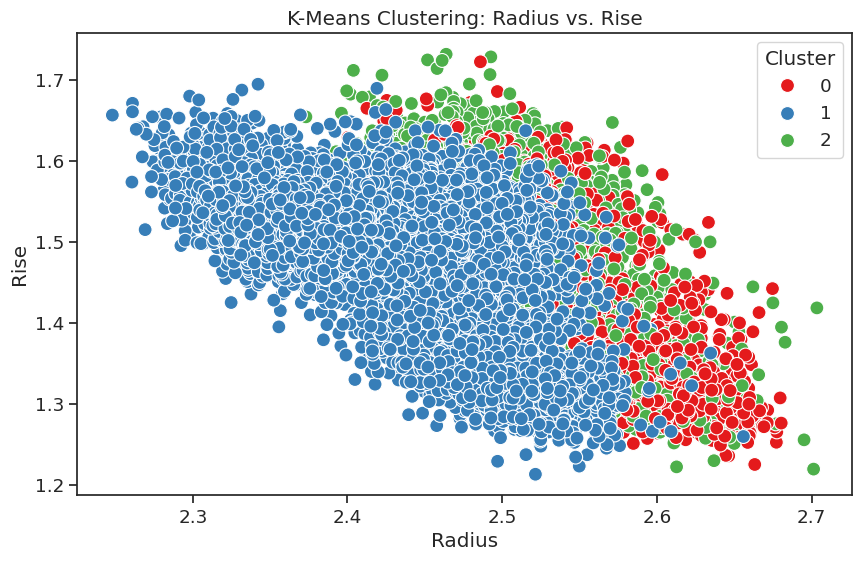

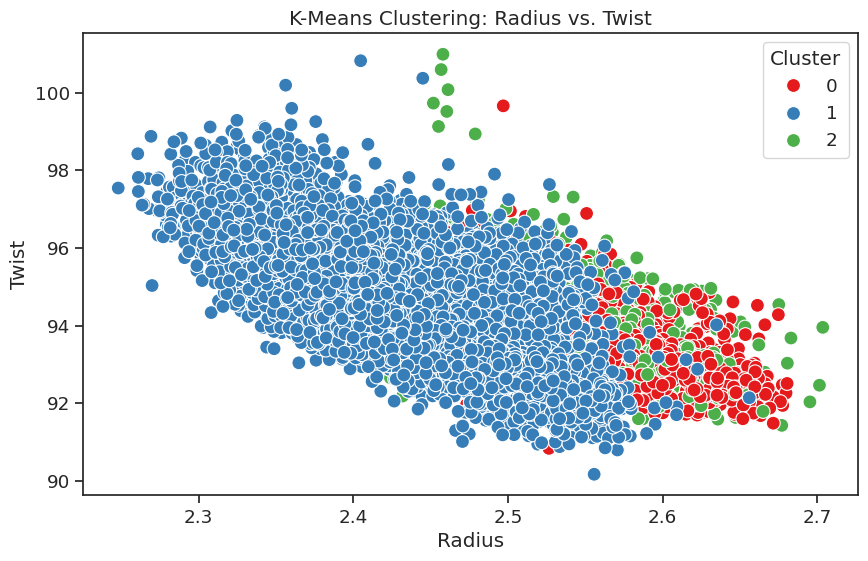

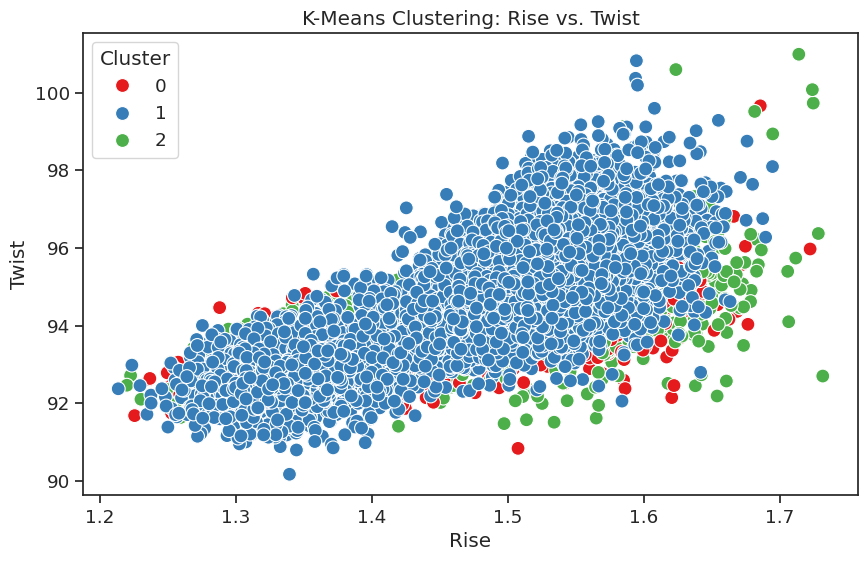

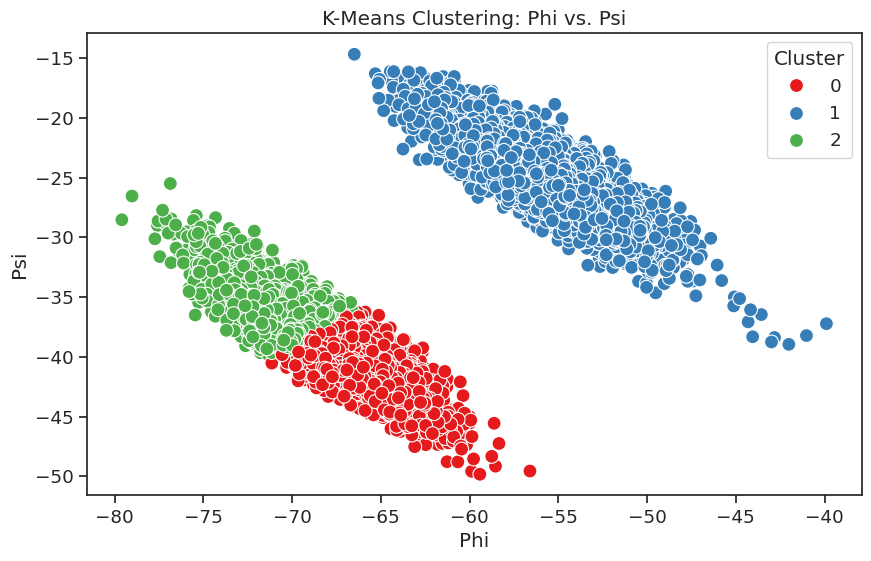

Cluster Centers for HelixnativeIAh2.csv:
[[  3.62427191  13.63510873   1.4104984   93.54883285   2.54312608
  -66.57446068 -40.34156057  17.04835309   3.85993757   3.92765433
    5.26660233]
 [  2.73686506  15.25915304   1.49865942  95.0705199    2.40806045
  -55.72639082 -25.01112842  18.12664779   3.86485061   4.19705301
    5.55130849]
 [  3.61259514  16.72666295   1.45121102  93.94724926   2.52534836
  -70.66857325 -35.9029835   17.55153451   3.91366546   4.11777802
    5.47418187]]




In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Step 1: Define the list of datasets and clustering parameters
datasets = ['HelixnativeIAh2.csv']  # Add dataset names
columns_for_clustering = ['Residue per turn', 'Carbonyl angle', 'Rise', 'Twist', 'Radius', 'Phi', 'Psi',
                           'Length','Hb3','Hb4','Hb5']
feature_pairs = [
    ('Residue per turn', 'Carbonyl angle'),
    ('Residue per turn', 'Phi'),
    ('Residue per turn', 'Psi'),
    ('Residue per turn', 'Length'),
    ('Residue per turn', 'Hb3'),
    ('Residue per turn', 'Hb4'),
    ('Residue per turn', 'Hb5'),
    ('Radius', 'Rise'),
    ('Radius', 'Twist'),
    ('Rise', 'Twist'),
    ('Phi', 'Psi')
]

# Step 2: Automation function
def process_and_cluster(dataset_path, feature_pairs, n_clusters=3):
    print(f"Processing dataset: {dataset_path}")

    # Load the dataset
    data = pd.read_csv(dataset_path)

    # Filter dataset for clustering columns
    X = data[columns_for_clustering]

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')  # Handle missing values
    X_imputed = imputer.fit_transform(X)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(X_imputed)

    # Step 3: Visualization
    for pair in feature_pairs:
        feature_x, feature_y = pair
        if feature_x in data.columns and feature_y in data.columns:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=data[feature_x], y=data[feature_y], hue=data['Cluster'], palette='Set1', s=100)
            plt.title(f'K-Means Clustering: {feature_x} vs. {feature_y}')
            plt.xlabel(feature_x)
            plt.ylabel(feature_y)
            plt.show()
        else:
            print(f"Skipping pair {pair} as one or both features are missing in the dataset.")

    # Print cluster centers
    print(f"Cluster Centers for {dataset_path}:")
    print(kmeans.cluster_centers_)
    print("\n")

# Step 4: Run the function for all datasets
for dataset in datasets:
    try:
        process_and_cluster(dataset, feature_pairs)
    except Exception as e:
        print(f"Error processing {dataset}: {e}")


Clustering Analysis using K-Means:

K-Means clustering was applied to detect relationships between residue per turn, carbonyl angle, and twist etc.

The red cluster (Cluster 0) is concentrated in a region where the carbonyl angle is higher, and residue per turn is lower. This suggests that in these structures, the helix is more tightly wound.

The blue cluster (Cluster 1) is located mostly in a region where the residue per turn is higher, but the carbonyl angle is lower. which could indicate that these helices are more loosely wound or expanded.

The green cluster (Cluster 2) lies in between the red and blue clusters, overlapping somewhat, but covering a range of intermediate values for both variables. It represents intermediate variations between tighter and looser helices.


In [1]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 4.4 MB/s eta 0:00:00



Transition Matrix for HelixnativeIAh1.csv:
Alpha-helix {'Alpha-helix': np.float64(0.778038705805971), '310-helix': np.float64(0.11281692139732762), 'Pi-helix': np.float64(0.0010202616748401833), 'Other': np.float64(0.10812411112186117)}
310-helix {'Alpha-helix': np.float64(0.23409396966137205), '310-helix': np.float64(0.021401687853828358), 'Pi-helix': np.float64(0.6053364603687733), 'Other': np.float64(0.13916788211602626)}
Pi-helix {'Alpha-helix': np.float64(0.020911607561176285), '310-helix': np.float64(0.024039978982328677), 'Pi-helix': np.float64(0.9084816222932426), 'Other': np.float64(0.046566791163252574)}
Other {'Alpha-helix': np.float64(0.0020415973835424127), '310-helix': np.float64(0.3323407360424942), 'Pi-helix': np.float64(0.0010140911313772645), 'Other': np.float64(0.6646035754425861)}


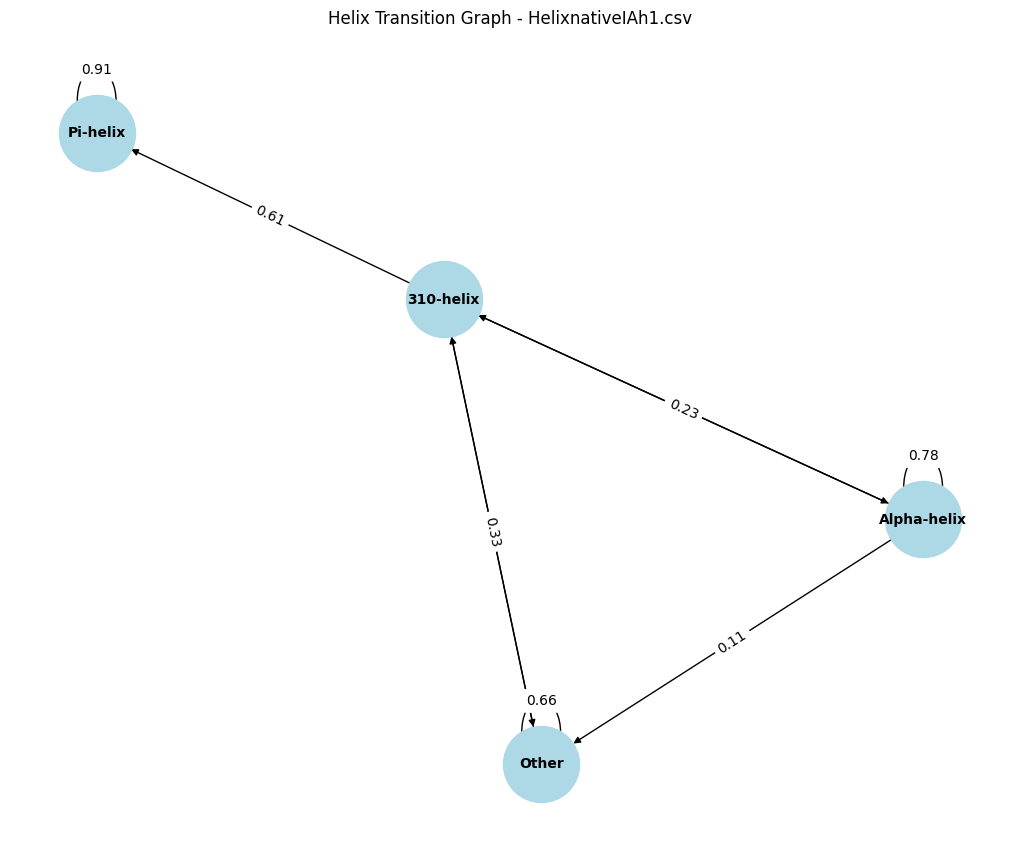


Transition Matrix for HelixnativeIAh2.csv:
Alpha-helix {'Alpha-helix': np.float64(0.2974437713735824), '310-helix': np.float64(0.12811347743556903), 'Pi-helix': np.float64(0.004355972018474598), 'Other': np.float64(0.5700867791723739)}
310-helix {'Alpha-helix': np.float64(0.0010195552967783889), '310-helix': np.float64(0.2929257037309195), 'Pi-helix': np.float64(0.5809248435678407), 'Other': np.float64(0.1251298974044615)}
Pi-helix {'Alpha-helix': np.float64(0.031621121355207706), '310-helix': np.float64(0.8855501507636702), 'Pi-helix': np.float64(0.0030868816125455005), 'Other': np.float64(0.07974184626857671)}
Other {'Alpha-helix': np.float64(0.23069841023980514), '310-helix': np.float64(0.002055763354261581), 'Pi-helix': np.float64(0.7662474683394648), 'Other': np.float64(0.0009983580664684986)}


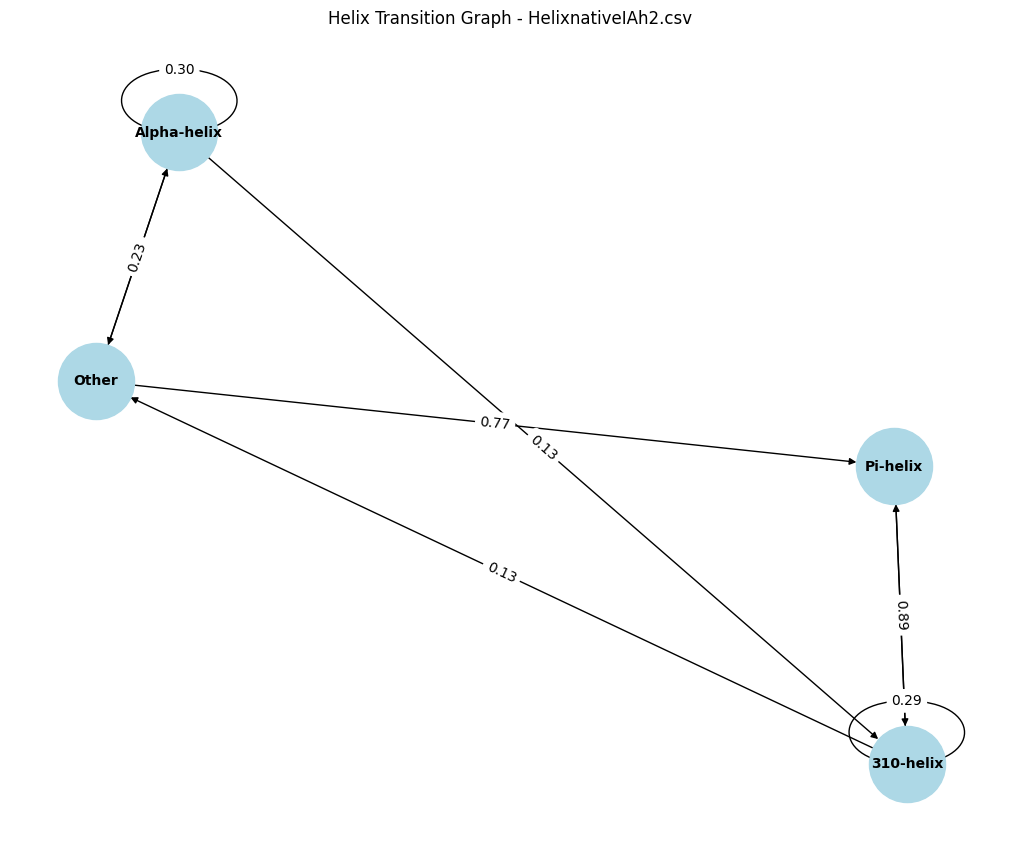


Transition Matrix for HelixnativeIah3.csv:
Alpha-helix {'Alpha-helix': np.float64(0.2972396876007147), '310-helix': np.float64(0.04539863183202862), 'Pi-helix': np.float64(0.49477967052392857), 'Other': np.float64(0.16258201004332817)}
310-helix {'Alpha-helix': np.float64(0.5069495856257642), '310-helix': np.float64(0.16086955441676384), 'Pi-helix': np.float64(0.002458018556360936), 'Other': np.float64(0.3297228414011109)}
Pi-helix {'Alpha-helix': np.float64(0.3849096479621184), '310-helix': np.float64(0.0053124287465456076), 'Pi-helix': np.float64(0.53923752309914), 'Other': np.float64(0.07054040019219594)}
Other {'Alpha-helix': np.float64(0.028215478613267807), '310-helix': np.float64(0.033726440929598554), 'Pi-helix': np.float64(0.2935098023890149), 'Other': np.float64(0.6445482780681187)}


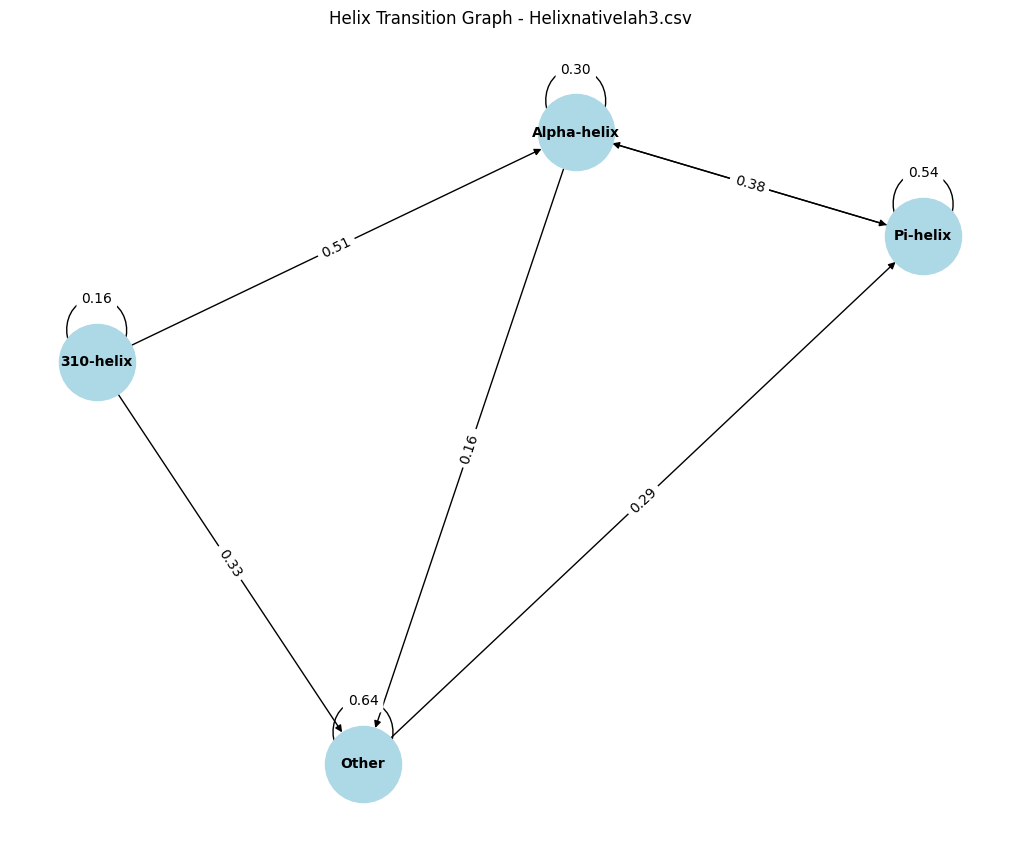

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from hmmlearn import hmm
import os
import warnings
import logging

# Suppress hmmlearn MultinomialHMM warning (Colab fix)
logging.getLogger('hmmlearn.hmm').setLevel(logging.ERROR)


# Define attribute ranges for different helix types
helix_ranges = {
    'Alpha-helix': {
        'Phi': (-62, -52), 'Psi': (-52, -42), 'Residue per turn': (3.5, 3.7),
        'Radius': (2.1, 2.3), 'Rise': (1.4, 1.6), 'Twist': (95, 105)
    },
    '310-helix': {
        'Phi': (-54, -44), 'Psi': (-31, -21), 'Residue per turn': (2.9, 3.1),
        'Radius': (1.7, 1.9), 'Rise': (1.8, 2.0), 'Twist': (116, 126)
    },
    'Pi-helix': {
        'Phi': (-62, -52), 'Psi': (-75, -65), 'Residue per turn': (4.1, 4.3),
        'Radius': (2.6, 2.8), 'Rise': (0.8, 1.0), 'Twist': (80, 90)
    }
}

def in_range(value, range_tuple):
    """Checks if a value is within a given range."""
    return range_tuple[0] <= value <= range_tuple[1]

def classify_helix(row):
    """Classifies a given row into a helix type based on all six features."""
    scores = {ht: 0 for ht in helix_ranges.keys()}

    for helix, params in helix_ranges.items():
        for feature, rng in params.items():
            if in_range(row[feature], rng):
                scores[helix] += 1  # Increment score for matching feature

    best_match = max(scores, key=scores.get)
    return best_match if scores[best_match] > 0 else 'Other'

def process_dataset(filename):
    """Processes the dataset, computes the transition matrix using HMM, and generates a transition graph."""
    try:
        # Load dataset
        data = pd.read_csv(filename)

        # Check if required columns exist
        required_columns = {'Phi', 'Psi', 'Residue per turn', 'Radius', 'Rise', 'Twist'}
        if not required_columns.issubset(data.columns):
            print(f"Error: Required columns missing in {filename}. Skipping...")
            return

        # Handle missing or invalid values
        if data.isnull().any().any():
            print(f"Warning: {filename} contains missing values. Filling with column means...")
            data.fillna(data.mean(), inplace=True)  # Fill missing values with column means

        # Apply classification
        data['Helix Type'] = data.apply(classify_helix, axis=1)

        # Define helix states
        helix_types = list(helix_ranges.keys()) + ['Other']
        helix_mapping = {ht: i for i, ht in enumerate(helix_types)}

        # Map helix types to indices
        data['Helix Type Index'] = data['Helix Type'].map(helix_mapping)

        # Prepare data for HMM (for transition visualization only)
        observations = data['Helix Type Index'].values.reshape(-1, 1)
        n_states = len(helix_types)

        # Train HMM (only for transition visualization)
        model = hmm.MultinomialHMM(n_components=n_states, n_iter=1000)
        model.fit(observations)

        # Extract transition matrix
        transition_matrix = model.transmat_

        # Apply Laplace Smoothing to avoid zero probabilities
        epsilon = 1e-3
        transition_matrix += epsilon
        transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)

        # Print transition matrix
        print(f"\nTransition Matrix for {filename}:")
        for i, from_type in enumerate(helix_types):
            print(from_type, {to_type: transition_matrix[i, j] for j, to_type in enumerate(helix_types)})

        # Create Markov transition graph
        G = nx.DiGraph()
        for i, from_type in enumerate(helix_types):
            for j, to_type in enumerate(helix_types):
                probability = transition_matrix[i, j]
                if probability > 0.1:  # Filter out small probabilities for better visualization
                    G.add_edge(from_type, to_type, weight=probability)

        # Draw transition graph
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(G, seed=42)
        nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
        edges = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in edges.items()})
        plt.title(f"Helix Transition Graph - {os.path.basename(filename)}")
        plt.show()

    except Exception as e:
        print(f"Error processing {filename}: {e}")

# Automate for multiple datasets
dataset_files = [
    "HelixnativeIAh1.csv","HelixnativeIAh2.csv","HelixnativeIah3.csv"
]

for dataset in dataset_files:
    if os.path.exists(dataset):
        process_dataset(dataset)
    else:
        print(f"Dataset {dataset} not found. Skipping...")

State Transition:(Albumin)- RPT, Phi, Psi, Radius, Rise, Twist.(Native-Iah1,Iah2,Iah3)                

1. Helix Iah2 exhibits a dynamic equilibrium between different secondary structures.

2. Alpha-helices show a significant tendency to transition to Pi-helices (0.387) with a moderate chance of staying Alpha (0.2974).

3. 310-helices frequently convert to Pi-helices (0.5809)

4. Pi-helices often transition to the '310' category (0.8855)
Overall, there's a general pattern of interconversion and transition, particularly between Alpha, Pi, and 'Other' states



Transition Matrix for Helix186lah1.csv:
Alpha-helix {'Alpha-helix': np.float64(0.7996097439440726), '310-helix': np.float64(0.04926915721652982), 'Pi-helix': np.float64(0.11465276036988731), 'Other': np.float64(0.03646833846951027)}
310-helix {'Alpha-helix': np.float64(0.06577860614763295), '310-helix': np.float64(0.001004698840767216), 'Pi-helix': np.float64(0.9300144431977105), 'Other': np.float64(0.003202251813889125)}
Pi-helix {'Alpha-helix': np.float64(0.016752504333606574), '310-helix': np.float64(0.4114089706003566), 'Pi-helix': np.float64(0.5707791810367819), 'Other': np.float64(0.001059344029254843)}
Other {'Alpha-helix': np.float64(0.00133068915121032), '310-helix': np.float64(0.0029791071233361724), 'Pi-helix': np.float64(0.571181622254347), 'Other': np.float64(0.42450858147110665)}


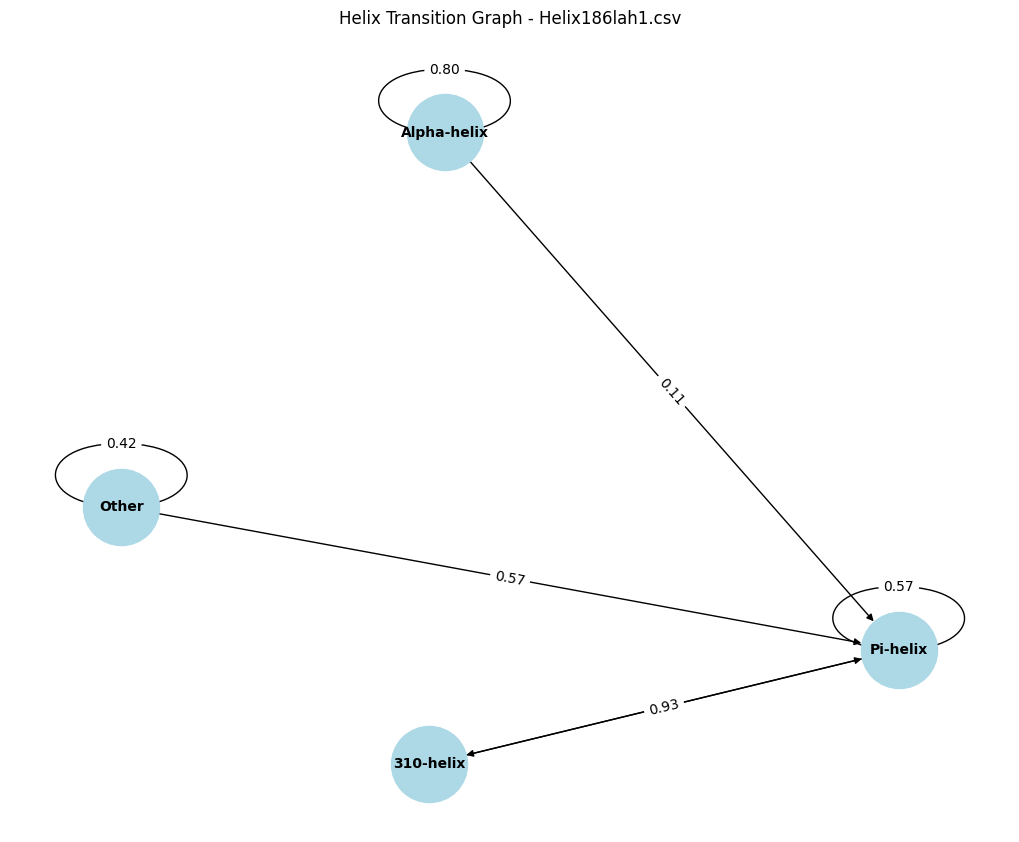

/usr/local/lib/python3.11/dist-packages/hmmlearn/hmm.py:942: RuntimeWarning: invalid value encountered in divide
  stats['obs'] / stats['obs'].sum(axis=1, keepdims=True))



Transition Matrix for Helix186lah2.csv:
Alpha-helix {'Alpha-helix': np.float64(0.0012123568392993116), '310-helix': np.float64(0.185733113382461), 'Pi-helix': np.float64(0.02135843552602035), 'Other': np.float64(0.7916960942522193)}
310-helix {'Alpha-helix': np.float64(0.16455006200163888), '310-helix': np.float64(0.8284447241311212), 'Pi-helix': np.float64(0.0017565775911350403), 'Other': np.float64(0.0052486362761050035)}
Pi-helix {'Alpha-helix': np.float64(0.9822861567128922), '310-helix': np.float64(0.015323648226194385), 'Pi-helix': np.float64(0.0011168908675258785), 'Other': np.float64(0.0012733041933875781)}
Other {'Alpha-helix': np.float64(0.0810535096846924), '310-helix': np.float64(0.09824720919269835), 'Pi-helix': np.float64(0.8150189842232785), 'Other': np.float64(0.005680296899330763)}


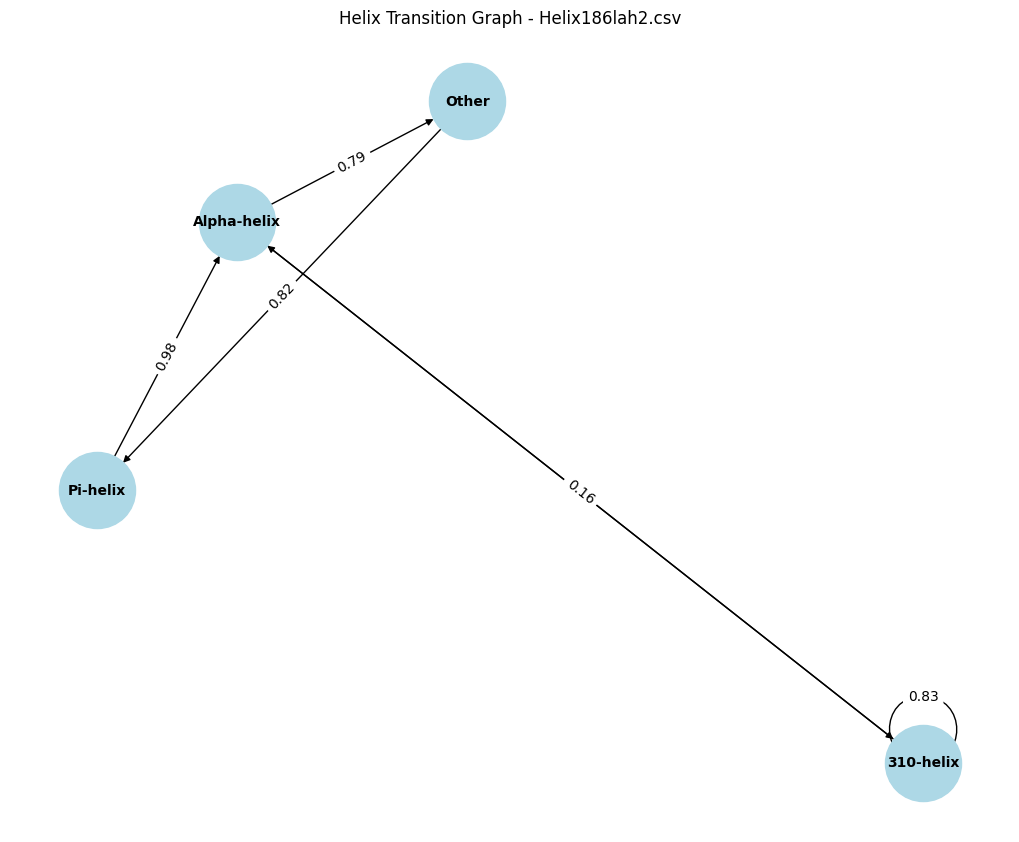

/usr/local/lib/python3.11/dist-packages/hmmlearn/hmm.py:942: RuntimeWarning: invalid value encountered in divide
  stats['obs'] / stats['obs'].sum(axis=1, keepdims=True))



Transition Matrix for Helix186lah3.csv:
Alpha-helix {'Alpha-helix': np.float64(0.7338827631185815), '310-helix': np.float64(0.041946466226978285), 'Pi-helix': np.float64(0.0025213458209623913), 'Other': np.float64(0.22164942483347788)}
310-helix {'Alpha-helix': np.float64(0.07694292213407954), '310-helix': np.float64(0.8575080629723831), 'Pi-helix': np.float64(0.05867283731591264), 'Other': np.float64(0.006876177577624572)}
Pi-helix {'Alpha-helix': np.float64(0.1576669807576491), '310-helix': np.float64(0.10120199522361177), 'Pi-helix': np.float64(0.7395102015612948), 'Other': np.float64(0.0016208224574444318)}
Other {'Alpha-helix': np.float64(0.1557444262225586), '310-helix': np.float64(0.0009962285399969816), 'Pi-helix': np.float64(0.3056578709867698), 'Other': np.float64(0.5376014742506747)}


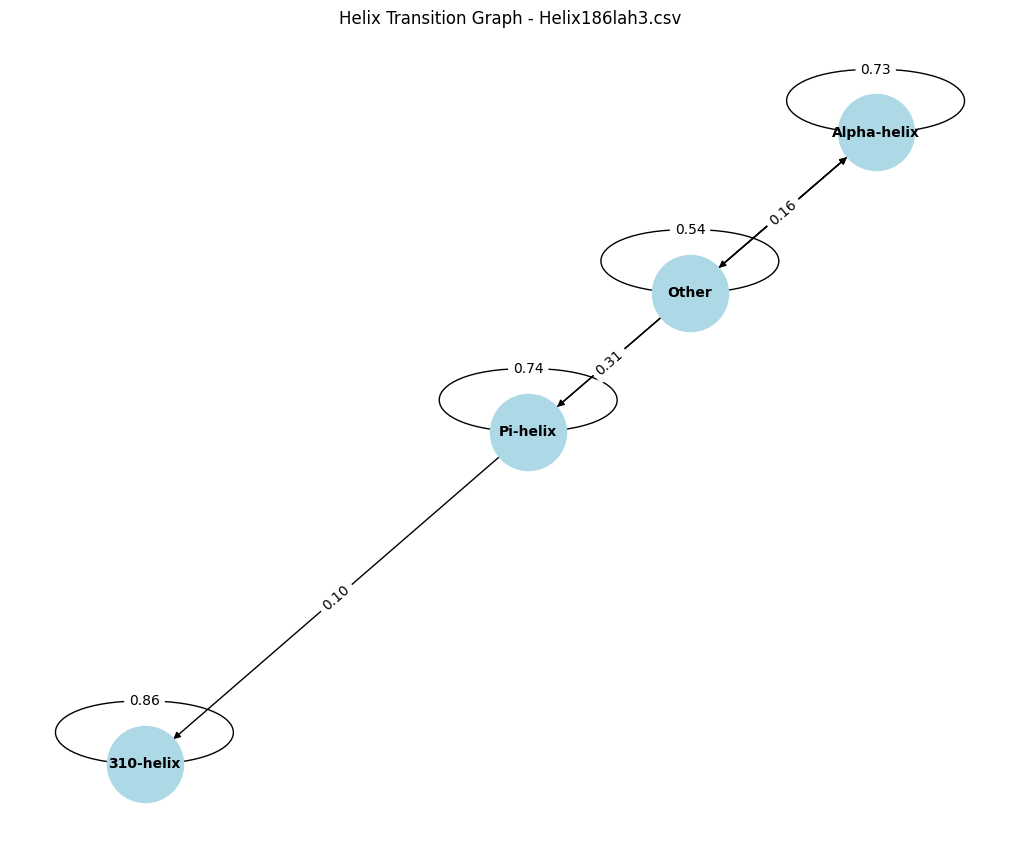

In [15]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from hmmlearn import hmm
import os
import warnings
import logging

# Suppress hmmlearn MultinomialHMM warning (Colab fix)
logging.getLogger('hmmlearn.hmm').setLevel(logging.ERROR)


# Define attribute ranges for different helix types
helix_ranges = {
    'Alpha-helix': {
        'phi': (-62, -52), 'psi': (-52, -42), 'residue per turn': (3.5, 3.7),
        'radius': (2.1, 2.3), 'rise': (1.4, 1.6), 'twist': (95, 105)
    },
    '310-helix': {
        'phi': (-54, -44), 'psi': (-31, -21), 'residue per turn': (2.9, 3.1),
        'radius': (1.7, 1.9), 'rise': (1.8, 2.0), 'twist': (116, 126)
    },
    'Pi-helix': {
        'phi': (-62, -52), 'psi': (-75, -65), 'residue per turn': (4.1, 4.3),
        'radius': (2.6, 2.8), 'rise': (0.8, 1.0), 'twist': (80, 90)
    }
}

def in_range(value, range_tuple):
    """Checks if a value is within a given range."""
    return range_tuple[0] <= value <= range_tuple[1]

def classify_helix(row):
    """Classifies a given row into a helix type based on all six features."""
    scores = {ht: 0 for ht in helix_ranges.keys()}

    for helix, params in helix_ranges.items():
        for feature, rng in params.items():
            if in_range(row[feature], rng):
                scores[helix] += 1  # Increment score for matching feature

    best_match = max(scores, key=scores.get)
    return best_match if scores[best_match] > 0 else 'Other'

def process_dataset(filename):
    """Processes the dataset, computes the transition matrix using HMM, and generates a transition graph."""
    try:
        # Load dataset
        data = pd.read_csv(filename)

        # Check if required columns exist
        required_columns = {'phi', 'psi', 'residue per turn', 'radius', 'rise', 'twist'}
        if not required_columns.issubset(data.columns):
            print(f"Error: Required columns missing in {filename}. Skipping...")
            return

        # Handle missing or invalid values
        if data.isnull().any().any():
            print(f"Warning: {filename} contains missing values. Filling with column means...")
            data.fillna(data.mean(), inplace=True)  # Fill missing values with column means

        # Apply classification
        data['Helix Type'] = data.apply(classify_helix, axis=1)

        # Define helix states
        helix_types = list(helix_ranges.keys()) + ['Other']
        helix_mapping = {ht: i for i, ht in enumerate(helix_types)}

        # Map helix types to indices
        data['Helix Type Index'] = data['Helix Type'].map(helix_mapping)

        # Prepare data for HMM (for transition visualization only)
        observations = data['Helix Type Index'].values.reshape(-1, 1)
        n_states = len(helix_types)

        # Train HMM (only for transition visualization)
        model = hmm.MultinomialHMM(n_components=n_states, n_iter=1000)
        model.fit(observations)

        # Extract transition matrix
        transition_matrix = model.transmat_

        # Apply Laplace Smoothing to avoid zero probabilities
        epsilon = 1e-3
        transition_matrix += epsilon
        transition_matrix /= transition_matrix.sum(axis=1, keepdims=True)

        # Print transition matrix
        print(f"\nTransition Matrix for {filename}:")
        for i, from_type in enumerate(helix_types):
            print(from_type, {to_type: transition_matrix[i, j] for j, to_type in enumerate(helix_types)})

        # Create Markov transition graph
        G = nx.DiGraph()
        for i, from_type in enumerate(helix_types):
            for j, to_type in enumerate(helix_types):
                probability = transition_matrix[i, j]
                if probability > 0.1:  # Filter out small probabilities for better visualization
                    G.add_edge(from_type, to_type, weight=probability)

        # Draw transition graph
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(G, seed=42)
        nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
        edges = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in edges.items()})
        plt.title(f"Helix Transition Graph - {os.path.basename(filename)}")
        plt.show()

    except Exception as e:
        print(f"Error processing {filename}: {e}")

# Automate for multiple datasets
dataset_files = [
    "Helix186lah1.csv","Helix186lah2.csv","Helix186lah3.csv"
]

for dataset in dataset_files:
    if os.path.exists(dataset):
        process_dataset(dataset)
    else:
        print(f"Dataset {dataset} not found. Skipping...")

State Transition:(Albumin)- RPT, Phi, Psi, Radius, Rise, Twist.(Glycated-Iah2)
1. Alpha-helices show an extremely high probability of transitioning to a other helix (0.7916).

2. 310-helices shows self transition about (0.8284).

3. Other' category exhibits a high probability of transitioning back to an Phi-Helix (0.8150).

4. This suggests a flow from Alpha to 310, then towards the 'Other' state from both 310 and Pi, with the potential for structures in the 'Other' state to revert to Alpha.
               


Conclusion:

The feature distribution analysis establishes a baseline of regular helical structures, while PCA reveals the primary modes of structural variation and their evolution over time.

In essence, the "State Transition" and "Comparison" sections provide the conclusions about the different conformational changes and stabilities observed in the native and glycated forms of Iah2.

These sections detail which helical states are favored, disfavored, or tend to interconvert in each specific case.
